In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20, 5

import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('data/weather_20132016.csv', encoding='cp932', header=3, usecols=[0,1,3,6]).iloc[1:,:]
# 年月日をdatetime型にし、indexにしておかないとtsa.seasonal_decompose関数使用時にエラーが発生
df['年月日'] = pd.to_datetime(df['年月日'])
df = df.set_index('年月日') 
df.head()

,平均気温(℃),降水量の合計(mm),平均風速(m/s)
年月日,,,
2013-01-01,NaN,0.0,2.4
2013-01-02,NaN,0.0,4.5
2013-01-03,NaN,0.0,3.6
2013-01-04,NaN,0.0,4.6
2013-01-05,NaN,0.0,2.2


In [28]:
df.columns

Index(['平均気温(℃)', '降水量の合計(mm)', '平均風速(m/s)'], dtype='object')

In [29]:
df.dtypes

平均気温(℃)       float64
降水量の合計(mm)    float64
平均風速(m/s)     float64
dtype: object

In [36]:
df.isnull().sum()

平均気温(℃)       700
降水量の合計(mm)      0
平均風速(m/s)       0
dtype: int64

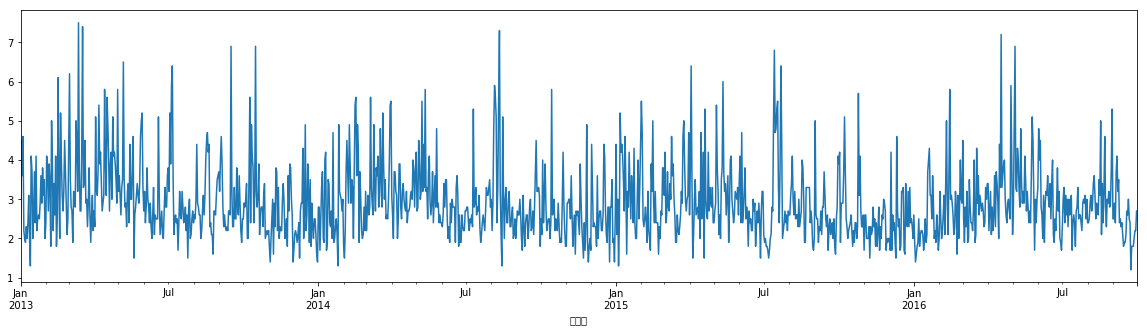

In [46]:
df['平均風速(m/s)'].plot()

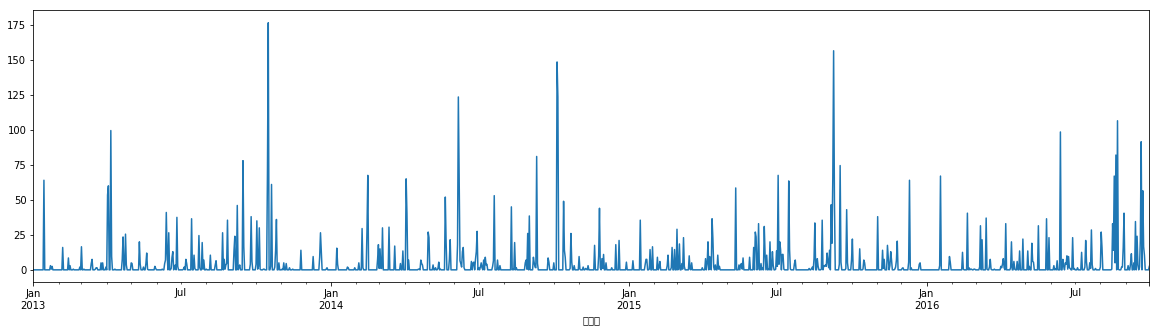

In [31]:
df['降水量の合計(mm)'].plot()

## 季節調整モデル

'# 元データ\nraw = df1\n\n#トレンドデータ\ntrend = res.trend\n\n#季節性データ\nseasonal = res.seasonal\n\n#残差データ\nresidual = res.resid'

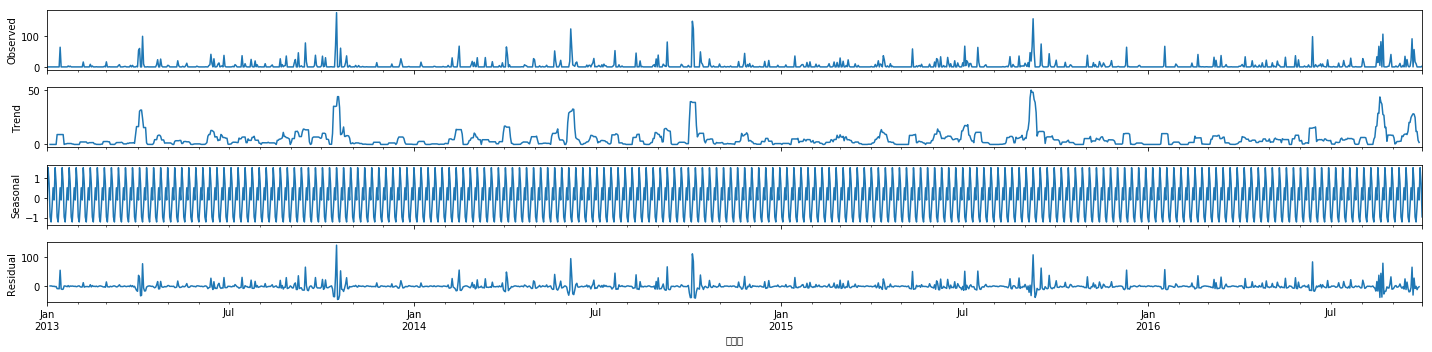

In [49]:
import statsmodels.api as sm

#　季節調整モデルの作成(欠損値があるとエラーが発生)
res = sm.tsa.seasonal_decompose(df['降水量の合計(mm)']) 

res.plot()

'''# 元データ
raw = df1

#トレンドデータ
trend = res.trend

#季節性データ
seasonal = res.seasonal

#残差データ
residual = res.resid'''

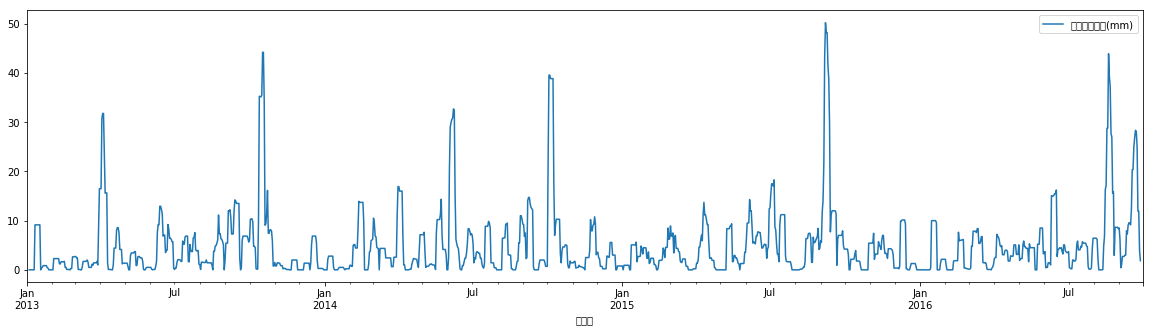

In [45]:
import statsmodels.api as sm

#　季節調整モデルの作成(欠損値があるとエラーが発生)
res = sm.tsa.seasonal_decompose(df['降水量の合計(mm)']) 

# トレンドデータのみ抽出
trend_s = res.trend#series型

trend_df = trend_s.reset_index().set_index('年月日')

trend_df.plot()

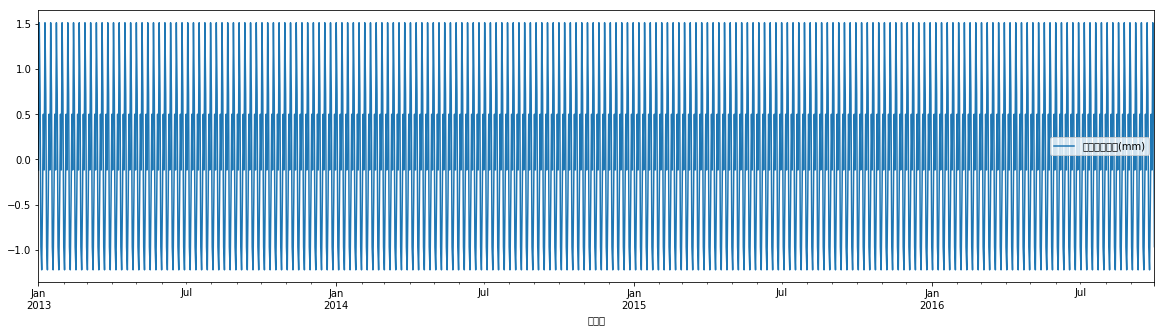

In [47]:
# 季節性データのみ抽出
seasonal_s = res.seasonal#series型

seasonal_df = seasonal_s.reset_index().set_index('年月日')

seasonal_df.plot()

降水量の合計(mm)
平均風速(m/s)


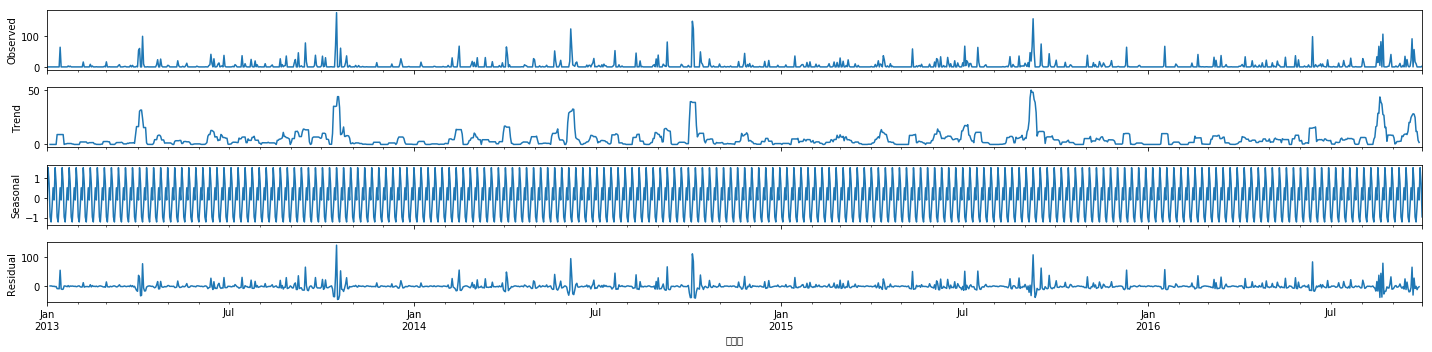

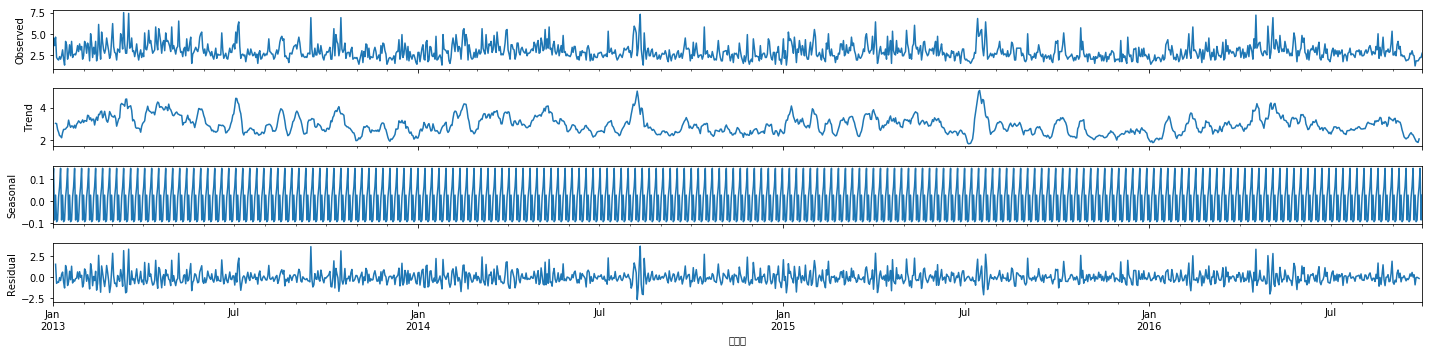

In [39]:
for col in df.columns.tolist()[1:]:
    res = sm.tsa.seasonal_decompose(df[col]) 
    print(col)
    res.plot()

参考

https://www.slideshare.net/ssuser49f8441/python-114923273

https://github.com/proglabo/python_series/blob/master/03_%E6%99%82%E7%B3%BB%E5%88%97%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E5%9F%BA%E6%9C%AC.ipynb

https://qiita.com/takubb/items/e5578a8143a4f6b0f7fc